In [1]:
#install and import necessary libraries for the project
!conda install -c conda-forge folium=0.11.0 --yes # folium new version
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library
import folium
import json # library to handle JSON files
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

print('Libraries are installed and imported!')

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - folium=0.11.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    branca-0.4.1               |             py_0          26 KB  conda-forge
    brotlipy-0.7.0             |py36h8c4c3a4_1000         346 KB  conda-forge
    chardet-3.0.4              |py36h9f0ad1d_1006         188 KB  conda-forge
    cryptography-2.9.2         |   py36h45558ae_0         613 KB  conda-forge
    folium-0.11.0              |             py_0          61 KB  conda-forge
    pysocks-1.7.1              |   py36h9f0ad1d_1          27 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         1.2 MB

The following NEW packages will be INSTALLED:

  branca             conda-forge/noarch::branca-0.4.1-py

In [2]:
#Baton Rouge lat and lon information
br_lat = 30.4192 
br_lon = -91.1449

# create a plain city map
br_map = folium.Map(location=[br_lat, br_lon], zoom_start=10)
br_map

In [3]:
#Read geojson file into a data frame
br_geo = r'Neighborhood.geojson' # geojson file

#Read neighborhood information into a data frame
df_br = pd.read_csv('Neighborhood.csv')
df_br.head()

,X,Y,gid,Name,description,community,id,neighborhood,planning_district,population
0,-91.076035,30.482581,1,NaN,NaN,EAST,57,PARK FOREST/OAKCREST,6,6857
1,-91.034190,30.440869,2,NaN,NaN,EAST,58,FAIRWOOD,12,6439
2,-91.133658,30.460864,3,NaN,NaN,MID CITY,1,EAST FAIRFIELDS/MELROSE PLACE,10,3281
3,-91.121647,30.461267,4,NaN,NaN,MID CITY,2,SMILEY HEIGHTS/MELROSE EAST,10,4430
4,-91.254457,30.515923,5,NaN,NaN,NORTH,3,THE AVENUES/SOUTHERN UNIV,4,4758


In [15]:
#delete non-used columns
del df_br['Name']
del df_br['description']

In [4]:
# add tile layers to the map
tiles = ['stamenwatercolor', 'cartodbpositron', 'openstreetmap', 'stamenterrain']
for tile in tiles:
    folium.TileLayer(tile).add_to(br_map)

# generate choropleth map using the total population of each neighborhood
folium.Choropleth(
    geo_data=br_geo,
    data=df_br,
    columns=['neighborhood','population'],
    key_on='feature.properties.neighborhood',
    fill_color='YlGnBu', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='BR Neighborhoos',
    smooth_factor=0,
    highlight=True,
    line_color='black'
).add_to(br_map)

# create a layer control
folium.LayerControl().add_to(br_map)


In [5]:
# add a marker to each neigborhood
for index,row in df_br.iterrows():
    lat = row['Y']
    lng = row['X']
    folium.Marker(
        [lat, lng],
        radius=5,
        color='green',
        popup=row['neighborhood'],
        fill = True,
        fill_color='green',
        fill_opacity=0.6
    ).add_to(br_map)
    
# display map
br_map

In [6]:
CLIENT_ID = 'VBXSTWM51FOOBV2MZLUMQT5UITMYSXIILAVW04KORPQLP42S' # your Foursquare ID
CLIENT_SECRET = 'C4LB20JG5AJVL3SNEYVOJ4PN5ANB5QIM3D1QOTY15AWAXELA' # your Foursquare Secret
VERSION = '20180604'

print('My credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

My credentails:
CLIENT_ID: VBXSTWM51FOOBV2MZLUMQT5UITMYSXIILAVW04KORPQLP42S
CLIENT_SECRET:C4LB20JG5AJVL3SNEYVOJ4PN5ANB5QIM3D1QOTY15AWAXELA


In [8]:
LIMIT = 100 # limit of number of venues returned by Foursquare API

# https://developer.foursquare.com/docs/build-with-foursquare/categories/
categoryId = "4bf58dd8d48988d13d941735" #category to high school

url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&categoryId={}&ll={},{}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    categoryId,
    br_lat, 
    br_lon, 
    LIMIT)

results = requests.get(url).json() 
schools = results['response']['venues']
nearby_venues = pd.json_normalize(schools) # flatten JSON
nearby_venues.dropna(subset=['location.postalCode'],inplace=True)

In [9]:
nearby_venues.reset_index(inplace=True, drop=True)
nearby_venues

,id,name,categories,referralId,hasPerk,location.lat,location.lng,location.labeledLatLngs,location.distance,location.cc,location.city,location.state,location.country,location.formattedAddress,location.address,location.postalCode,location.crossStreet
0,4ca49a717f84224b82a5ce58,Lee Magnet High School,"[{'id': '4bf58dd8d48988d13d941735', 'name': 'H...",v-1590599523,False,30.406771,-91.152079,"[{'label': 'display', 'lat': 30.40677064307260...",1545,US,Baton Rouge,LA,United States,"[1105 Lee Dr, Baton Rouge, LA 70808, United St...",1105 Lee Dr,70808,NaN
1,50441763e4b06a6d9f792997,Xcution,"[{'id': '4bf58dd8d48988d13d941735', 'name': 'H...",v-1590599523,False,30.448140,-90.863403,"[{'label': 'display', 'lat': 30.44814, 'lng': ...",27209,US,Denham Springs,LA,United States,"[Denham Springs, LA 70726, United States]",NaN,70726,NaN
2,4bc38016920eb713f28b1d2c,Baton Rouge Magnet High School,"[{'id': '4bf58dd8d48988d13d941735', 'name': 'H...",v-1590599523,False,30.446467,-91.159913,"[{'label': 'display', 'lat': 30.44646663135539...",3359,US,Baton Rouge,LA,United States,"[2820 Government Street, Baton Rouge, LA 70806...",2820 Government Street,70806,NaN
3,4c116cae416620a11e16d9e4,East Ascension High School,"[{'id': '4bf58dd8d48988d13d941735', 'name': 'H...",v-1590599523,False,30.226997,-90.914984,"[{'label': 'display', 'lat': 30.22699687253794...",30754,US,Gonzales,LA,United States,"[Gonzales, LA 70737, United States]",NaN,70737,NaN
4,4ec1759eb803bca7defaadf1,St. Joseph Hall,"[{'id': '4bf58dd8d48988d13d941735', 'name': 'H...",v-1590599523,False,30.440395,-91.150993,"[{'label': 'display', 'lat': 30.4403949, 'lng'...",2430,US,Baton Rouge,LA,United States,"[Broussard St, Baton Rouge, LA 70808, Baton Ro...","Broussard St, Baton Rouge, LA 70808",70808,NaN
5,4c9d3a9554c8a1cdb4d0814b,Baker high,"[{'id': '4bf58dd8d48988d13d941735', 'name': 'H...",v-1590599523,False,30.587010,-91.164385,"[{'label': 'display', 'lat': 30.58701001619391...",18773,US,Baker,LA,United States,"[Baker, LA 70714, United States]",NaN,70714,NaN
6,4bfe6fe2f61dc9b65566a0de,Family Christian Academy,"[{'id': '4bf58dd8d48988d13d941735', 'name': 'H...",v-1590599523,False,30.384297,-91.091724,"[{'label': 'display', 'lat': 30.38429702368381...",6415,US,Baton Rouge,LA,United States,"[8919 World Ministry Ave, Baton Rouge, LA 7081...",8919 World Ministry Ave,70810,NaN
7,4f881451e4b0089de79523cf,Northdale North Academy,"[{'id': '4bf58dd8d48988d13d941735', 'name': 'H...",v-1590599523,False,30.517751,-91.134420,"[{'label': 'display', 'lat': 30.517751, 'lng':...",11016,US,Baton Rouge,LA,United States,"[5656 Cadillac St, Baton Rouge, LA 70811, Unit...",5656 Cadillac St,70811,NaN
8,4cc718643d7fa1cd3732bb5f,Capitol High School,"[{'id': '4bf58dd8d48988d13d941735', 'name': 'H...",v-1590599523,False,30.458965,-91.164646,"[{'label': 'display', 'lat': 30.45896529907351...",4815,US,Baton Rouge,LA,United States,"[1000 N 23rd St (Fuqua), Baton Rouge, LA 70802...",1000 N 23rd St,70802,Fuqua
9,4e5f795b149582866d4103c8,SJA Medaille Hall,"[{'id': '4bf58dd8d48988d13d941735', 'name': 'H...",v-1590599523,False,30.436595,-91.156460,"[{'label': 'display', 'lat': 30.43659543333333...",2231,US,Baton Rouge,LA,United States,"[St. Joseph's Academy, Baton Rouge, LA 70764, ...",St. Joseph's Academy,70764,NaN


In [10]:
br_map2 = folium.Map(location=[br_lat, br_lon], zoom_start=10)
# generate choropleth map using the total population of each neighborhood
folium.Choropleth(
    geo_data=br_geo,
    data=df_br,
    columns=['neighborhood','population'],
    key_on='feature.properties.neighborhood',
    fill_color='YlGnBu', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='BR Neighborhoos',
    smooth_factor=0,
    highlight=True,
    line_color='black'
).add_to(br_map2)

# add a marker for each high schools
for index,row in nearby_venues.iterrows():
    lat = row['location.lat']
    lng = row['location.lng']
    folium.Marker(
        [lat, lng],
        radius=5,
        color='green',
        popup=row['name'],
        fill = True,
        fill_color='red',
        fill_opacity=0.6
    ).add_to(br_map2)
    
# display map
br_map2


In [11]:
#define a function to creae specific url to make a search for each neighborhood
def set_url(xlat,ylon,radius):
    
    url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&categoryId={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    categoryId,
    xlat, 
    ylon, 
    radius, 
    LIMIT)
    
    return url


In [12]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
# query = "high school" #search for high schools closed to neighborhood
# https://developer.foursquare.com/docs/build-with-foursquare/categories/
categoryId = "4bf58dd8d48988d13d941735" #category ID for high school

In [14]:
#search for number of high schools in each neighborhood within 2000, 4000, 6000 meters 1.2, 2.5, 3.7 miles
radius = [2000, 4000, 6000]
for r in radius:
    for index,row in df_br.iterrows():
        lat = row['Y']
        lon = row['X']
        url = set_url(lat,lon,r)
        results = requests.get(url).json() 
        schools = results['response']['venues']
        nearby_venues = pd.json_normalize(schools) # flatten JSON
        #nearby_venues.dropna(subset=['location.postalCode'],inplace=True)
        df_br.loc[index, str(r)] = int(len(nearby_venues))  

In [16]:
df_br

,X,Y,gid,community,id,neighborhood,planning_district,population,2000,4000,6000
0,-91.076035,30.482581,1,EAST,57,PARK FOREST/OAKCREST,6,6857,1.0,3.0,10.0
1,-91.034190,30.440869,2,EAST,58,FAIRWOOD,12,6439,1.0,6.0,11.0
2,-91.133658,30.460864,3,MID CITY,1,EAST FAIRFIELDS/MELROSE PLACE,10,3281,3.0,16.0,25.0
3,-91.121647,30.461267,4,MID CITY,2,SMILEY HEIGHTS/MELROSE EAST,10,4430,1.0,13.0,26.0
4,-91.254457,30.515923,5,NORTH,3,THE AVENUES/SOUTHERN UNIV,4,4758,0.0,0.0,1.0
5,-91.164122,30.399546,6,SOUTH,4,COLLEGE TOWN,13,3732,7.0,14.0,19.0
6,-91.139954,30.389799,7,SOUTH,5,UNIVERSITY ACRES/WOODSTONE,14,4673,6.0,8.0,20.0
7,-91.084463,30.336785,8,SOUTHWEST,6,SOUTH BLUEBONNET/NICHOLSON,16,6775,0.0,0.0,4.0
8,-91.125106,30.381854,9,SOUTH,7,KENILWORTH,14,3203,0.0,9.0,13.0
9,-91.134790,30.402801,10,SOUTH,8,POLLARD/WOODCHASE,14,3916,6.0,14.0,25.0


In [18]:
#calculate high school proximity score and  ProScore per 1000 people
df_br['ProScore'] = df_br['2000']*3 + df_br['4000']*2 + df_br['6000']
df_br['ProScore_per_1K'] = df_br['ProScore'] * 1000 / df_br['population']
df_br

,X,Y,gid,community,id,neighborhood,planning_district,population,2000,4000,6000,ProScore,ProScore_per_1K
0,-91.076035,30.482581,1,EAST,57,PARK FOREST/OAKCREST,6,6857,1.0,3.0,10.0,19.0,2.770891
1,-91.034190,30.440869,2,EAST,58,FAIRWOOD,12,6439,1.0,6.0,11.0,26.0,4.037894
2,-91.133658,30.460864,3,MID CITY,1,EAST FAIRFIELDS/MELROSE PLACE,10,3281,3.0,16.0,25.0,66.0,20.115818
3,-91.121647,30.461267,4,MID CITY,2,SMILEY HEIGHTS/MELROSE EAST,10,4430,1.0,13.0,26.0,55.0,12.415350
4,-91.254457,30.515923,5,NORTH,3,THE AVENUES/SOUTHERN UNIV,4,4758,0.0,0.0,1.0,1.0,0.210172
5,-91.164122,30.399546,6,SOUTH,4,COLLEGE TOWN,13,3732,7.0,14.0,19.0,68.0,18.220793
6,-91.139954,30.389799,7,SOUTH,5,UNIVERSITY ACRES/WOODSTONE,14,4673,6.0,8.0,20.0,54.0,11.555746
7,-91.084463,30.336785,8,SOUTHWEST,6,SOUTH BLUEBONNET/NICHOLSON,16,6775,0.0,0.0,4.0,4.0,0.590406
8,-91.125106,30.381854,9,SOUTH,7,KENILWORTH,14,3203,0.0,9.0,13.0,31.0,9.678426
9,-91.134790,30.402801,10,SOUTH,8,POLLARD/WOODCHASE,14,3916,6.0,14.0,25.0,71.0,18.130746


In [59]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

In [29]:
df_br.sort_values(['ProScore_per_1K'], ascending=True, axis=0, inplace=True)

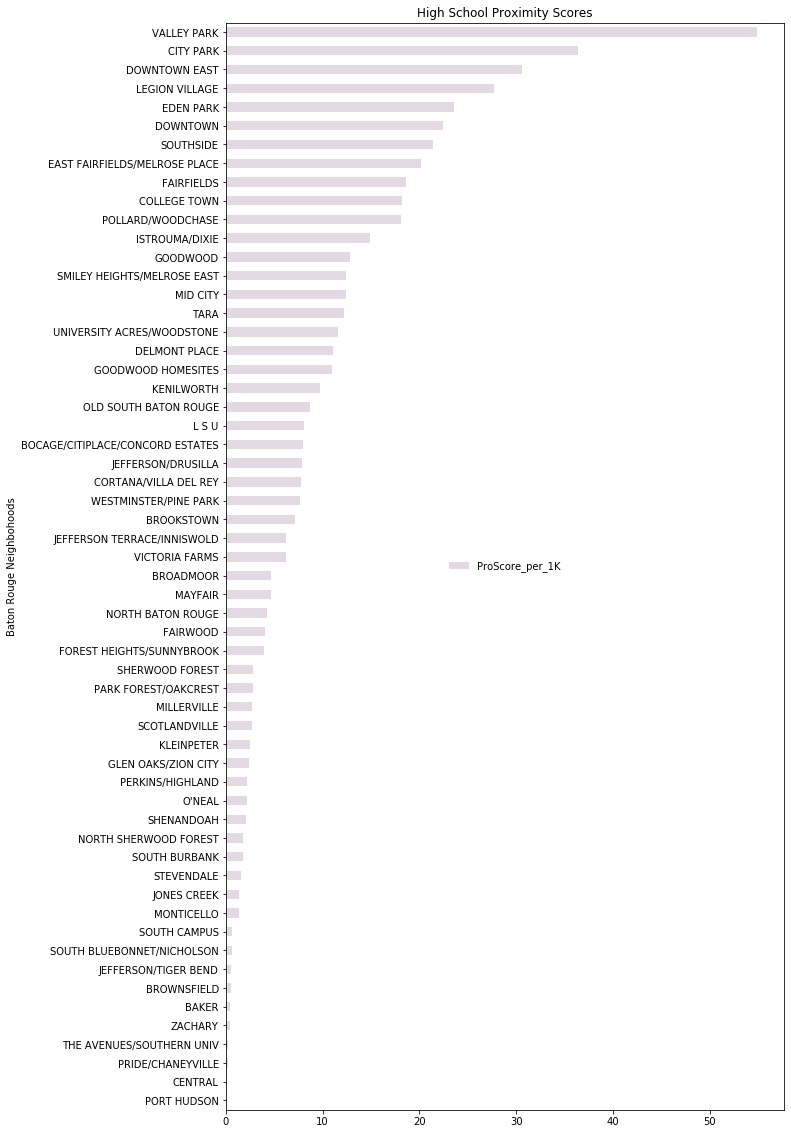

In [55]:
from matplotlib import pyplot as plt

df_br.plot.barh(x="neighborhood", y="ProScore_per_1K", title="High School Proximity Scores", figsize=(10,20), colormap='twilight')
plt.ylabel('Baton Rouge Neighbohoods')
plt.legend(loc='center', frameon=False)
plt.savefig('bargraph.png')

In [38]:
br_map3 = folium.Map(location=[br_lat, br_lon], zoom_start=10)
# generate choropleth map using proximity score
folium.Choropleth(
    geo_data=br_geo,
    data=df_br,
    columns=['neighborhood','ProScore'],
    key_on='feature.properties.neighborhood',
    fill_color='YlGnBu', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='BR Neighborhoos',
    smooth_factor=0,
    highlight=True,
    line_color='black'
).add_to(br_map3)

for i,row in df_br.iterrows():
    lat = row['Y']
    lon = row['X']
    folium.Circle(
        location=[lat,lon],
        popup = row['neighborhood'],
        radius= row['ProScore_per_1K']*10,
        color='crimson',
        fill=False,
        fill_color='crimson'
    ).add_to(br_map3)

br_map3